# 1. Scraping static websites

Let's first install the needed libraries : 

- ```requests``` to do http requests
- ```beautifulsoup``` to parse html code

In [1]:
! pip install requests beautifulsoup4

In [ ]:
pip install bs4

In [2]:
import requests
from bs4 import BeautifulSoup

## 1.1 Make requests with the ```requests``` library

### Request an "easy" website

First test on the documentation of the ```requests``` library.

In [8]:
url = "https://www.auchan.fr/oeufs-produits-laitiers/cremerie-oeufs-laits/ca-n0101?page=6"
response = requests.get(url)
print(response.status_code)

200


In [4]:
type(response)

requests.models.Response

In [9]:
print(response)

<Response [200]>


In [5]:
print(response.text)

<!DOCTYPE html><html lang="fr"><head prefix="og: http://ogp.me/ns#"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_styleguide2/dist/main.min.css"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_carousel3/dist/main.min.css"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_collapsible2/dist/main.min.css"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_overlay2/dist/main.min.css"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_notifier2/dist/main.min.css"><link rel="stylesheet" href="/asset-server/sav_2025.04.16-0/webjars/a_tooltip1/dist/main.min.css"><link rel="preconnect" href="https://cdn.auchan.fr"><link rel="preconnect" href="https://api.auchan.fr"><link rel="preload" href="/xch/v8/cart-renderer/sav_2025-12-19-0/css/add-to-cart-styles.min.css" as="style" /><link rel="preload" href="/xch/v8/cart-renderer/sav_2025-12-19-0/css/header-cart-styles.min.css" as="style" /><link rel="

In [10]:
with open("response.html", "w") as f:
    f.write(response.text)

In your current file, you can double click on the response.html file to display it in you web browser.

### Request a more complex website

Modifying the requests parameters

In [11]:
url = "https://fr.wikipedia.org/wiki/Albert_School"
r = requests.get(url)

print("Responsse :",r.status_code)

Responsse : 403


For privacy reason, Wikipedia doesn't allow a bot to scrape its data, see why here with the [robots.txt](https://www.wikipedia.org/robots.txt)

In [13]:
url = "https://fr.wikipedia.org/wiki/Albert_School"

# let's change the superagent to "act human"
# why mozilla ?
# for those interested, a bit of culture here
# https://en.wikipedia.org/wiki/User-Agent_header#Format_for_human-operated_web_browsers
user_agent = {'User-agent': 'Mozilla/5.0'}
r = requests.get(url,
                 headers=user_agent)

print("Response :",r.status_code)

Response : 200


In [15]:
df = [1, 2, 3]
import pandas as pd

df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

In [17]:
print(r.text[:100])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la


It is possible to complexify the GET request parameters by adding proxys, client configurations, persisting cookies...

### Exercice : request the CAN wikipedia webpage

In [10]:
url = "https://fr.wikipedia.org/wiki/Coupe_d%27Afrique_des_nations_de_football"
user_agent = {'User-agent': 'Mozilla/5.0'}

response = requests.get(url,
             headers=user_agent)

In [11]:
type(response)

requests.models.Response

In [12]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Coupe d\'Afrique des nations de football — Wikipédia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [18]:
with open("fichier.html", "w") as f:
    f.write(response.text)

In [14]:
!pwd

/home/basile/Nextcloud/Administratif/Taf/Albert School/5. Scraping & pandas/scraping_pandas_as


## 1.2. Parse a static page with ```BeautifulSoup```


```BeautifulSoup``` enables elements extraction from an HTML page with the help of code tags.

First let's load the html in a ```BeautifulSoup``` object

In [19]:
url = "https://pypi.org/project/requests/"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

type(soup)

bs4.BeautifulSoup

In [24]:
with open("fichier_pypy.html", "w") as f:
    f.write(response.text)

In [20]:
soup.get_text()

'\n\n\n\n\n\n\n\nrequests · PyPI\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main content\nSwitch to mobile version\n\n\n\n\n\n\n\nWarning\n\nSome features may not work without JavaScript. Please try enabling it if you encounter problems.\n\n\n \n\n\n\n\n\n\n\n\n\n\nSearch PyPI\n\n\n\nSearch\n\n\n\n \n\n\n\nHelp\n\n\nDocs\n\n\nSponsors\n\n\nLog in\n\n\nRegister\n\n\n\n\n\nMenu        \n\n\n\n\n\nHelp\n\n\nDocs\n\n\nSponsors\n\n\nLog in\n\n\nRegister\n\n\n\n\n \n\n\n\n\nSearch PyPI\n\n\n\nSearch\n\n\n\n\n\n\n\nrequests 2.32.5\n\n\npip install requests\n\n\nCopy PIP instructions\n\n\n\n\n\n\nLatest version\n\n\nReleased: \n    Aug 18, 2025\n   \n\n\n\n\n\n \nPython HTTP for Humans.\n \n\n\n\n\n\n\n\nNavigation\n\n\n\n\n\nProject description                \n\n\n\n\nRelease history                \n\n\n\n\nDownload files                  \n\n\n\n\n\n\nVerified details    \n\nThese details have been verified by PyPI\nMaintainers\n\n\n\n\n\ngraffatcolmingov\n\n\n\n\n\n\n

We can then look at the element with the object tag within the code

In [21]:
titres = soup.find_all('h1')
listes = []
for titre in titres:
    listes.append(titre)

listes

[<h1 class="package-header__name">requests 2.32.5</h1>, <h1>Requests</h1>]

We can also look for a specific object with its id or class attribute

In [25]:
soup.find('h1')

<h1 class="package-header__name">requests 2.32.5</h1>

In [ ]:
soup.find(id="pip-command")

<span data-clipboard-target="source" id="pip-command">pip install requests</span>

To sum up, navigation after using ```BeautifulSoup``` :
- soup.find(tag) : Find the first occurence of a tag
  
- soup.find_all(tag) : Fin all occurences of a tag
  
- element.parent : Access the parent of an element
  
- element.children : Access the children of an element
  
- element.next_sibling : Access the next sibling of an element


More infos here : 

- [navigating the tree](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree)
- A common way of looking for a tag is to use xpath with a parser like ```lxml```

### Exercice : how many hypertexts linkes is there in the AFCon wikipedia page ? 

In [26]:
url = "https://fr.wikipedia.org/wiki/Coupe_d%27Afrique_des_nations_de_football"
user_agent = {'User-agent': 'Mozilla/5.0'}

response = requests.get(url,
             headers=user_agent)



In [27]:
with open("fichier_can.html", "w") as f:
    f.write(response.text)

In [23]:
print(response.status_code)

200


In [31]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Coupe d\'Afrique des nations de football — Wikipédia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [25]:
soup = BeautifulSoup(response.text, "html.parser")

In [26]:
(type(soup))

bs4.BeautifulSoup

In [30]:
soup.find_all("a")

[<a class="skip-to-content" href="#content">Skip to main content</a>,
 <a class="site-header__logo" href="/">
 <img alt="PyPI" src="/static/images/logo-small.8998e9d1.svg"/>
 </a>,
 <a class="horizontal-menu__link" href="/help/">Help</a>,
 <a class="horizontal-menu__link" href="https://docs.pypi.org/">Docs</a>,
 <a class="horizontal-menu__link" href="/sponsors/">Sponsors</a>,
 <a class="horizontal-menu__link" href="/account/login/?next=https%3A%2F%2Fpypi.org%2Fproject%2Frequests%2F">Log in</a>,
 <a class="horizontal-menu__link" href="/account/register/">Register</a>,
 <a class="dropdown__link" href="/help/">Help</a>,
 <a class="dropdown__link" href="https://docs.pypi.org/">Docs</a>,
 <a class="dropdown__link" href="/sponsors/">Sponsors</a>,
 <a class="dropdown__link" href="/account/login/?next=https%3A%2F%2Fpypi.org%2Fproject%2Frequests%2F">Log in</a>,
 <a class="dropdown__link" href="/account/register/">Register</a>,
 <a class="status-badge status-badge--good" href="/project/requests/

In [28]:
len(soup.find_all("a"))

2941

## 1.3. TP : PIB de la France 

With the  [wikipedia page of french PIB](https://fr.wikipedia.org/wiki/Produit_int%C3%A9rieur_brut_de_la_France) : 

- extract the table 
- create a DataFrame with the year and the value of the PIB
- sum it all in a graph 

In [22]:
## votre code

In [32]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

URL = "https://fr.wikipedia.org/wiki/Produit_int%C3%A9rieur_brut_de_la_France"
HEADERS = {"User-Agent": "Mozilla/5.0"}

resp = requests.get(URL, headers=HEADERS, timeout=20)
resp.raise_for_status()

soup = BeautifulSoup(resp.text, "html.parser")

In [35]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="fr">
<head>
<meta charset="utf-8"/>
<title>Produit intérieur brut de la France — Wikipédia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-

In [38]:
section = soup.find("h2", id="Produit_intérieur_brut_en_euros_courants")

print(section)


<h2 id="Produit_intérieur_brut_en_euros_courants"><span id="Produit_int.C3.A9rieur_brut_en_euros_courants"></span>Produit intérieur brut en euros courants</h2>


In [39]:
section = soup.find("h2", id="Produit_intérieur_brut_en_euros_courants")

tables = []
for sibling in section.find_all_next():
    if sibling.name == "h2":
        break
    if sibling.name == "table":
        tables.append(sibling)

len(tables)

8

In [46]:
for table in tables:
    print(table)

<table class="wikitable alternance" style="text-align:right;">
<tbody><tr>
<th>Année
</th>
<th>PIB (en milliards d'euros)
</th></tr>
<tr>
<td>1949
</td>
<td>13,2
</td></tr>
<tr>
<td>1950
</td>
<td>15,5
</td></tr>
<tr>
<td>1951
</td>
<td>19,6
</td></tr>
<tr>
<td>1952
</td>
<td>22,8
</td></tr>
<tr>
<td>1953
</td>
<td>23,7
</td></tr>
<tr>
<td>1954
</td>
<td>25,1
</td></tr>
<tr>
<td>1955
</td>
<td>27,0
</td></tr>
<tr>
<td>1956
</td>
<td>29,8
</td></tr>
<tr>
<td>1957
</td>
<td>33,6
</td></tr>
<tr>
<td>1958
</td>
<td>38,8
</td></tr>
<tr>
<td>1959
</td>
<td>42,4
</td></tr>
<tr>
<td>1960
</td>
<td>47,0
</td></tr>
<tr>
<td>1961
</td>
<td>50,9
</td></tr>
<tr>
<td>1962
</td>
<td>57,1
</td></tr>
<tr>
<td>1963
</td>
<td>64,0
</td></tr>
<tr>
<td>1964
</td>
<td>71,0
</td></tr>
<tr>
<td>1965
</td>
<td>76,6
</td></tr>
<tr>
<td>1966
</td>
<td>83,0
</td></tr>
<tr>
<td>1967
</td>
<td>89,8
</td></tr>
<tr>
<td>1968
</td>
<td>98,0
</td></tr></tbody></table>
<table class="wikitable alternance" style="text-ali

In [47]:
import re

data = []

for table in tables:
    for row in table.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            year = cells[0].get_text(strip=True)
            value_raw = cells[1].get_text(strip=True)
            m = re.search(r"[\d\s\xa0,]+(?=\()", value_raw) or re.search(r"[\d\s\xa0,]+", value_raw)
            value = m.group(0)
            value = (
                value
                .replace(" ", "")
                .replace(",", ".")
                .replace("\xa0", "")
            )

            data.append({
                "year": int(year),
                "gdp_eur_billion": float(value)
            })

data[:5]

[{'year': 1949, 'gdp_eur_billion': 13.2},
 {'year': 1950, 'gdp_eur_billion': 15.5},
 {'year': 1951, 'gdp_eur_billion': 19.6},
 {'year': 1952, 'gdp_eur_billion': 22.8},
 {'year': 1953, 'gdp_eur_billion': 23.7}]

In [45]:
import pandas as pd

df = pd.DataFrame(data)
df.tail()

,year,gdp_eur_billion
111,1995,1146.4
112,2000,1308.4
113,2001,1335.8
114,2002,1351.6
115,2003,1358.0


In [49]:
df.sort_values("year", inplace=True)

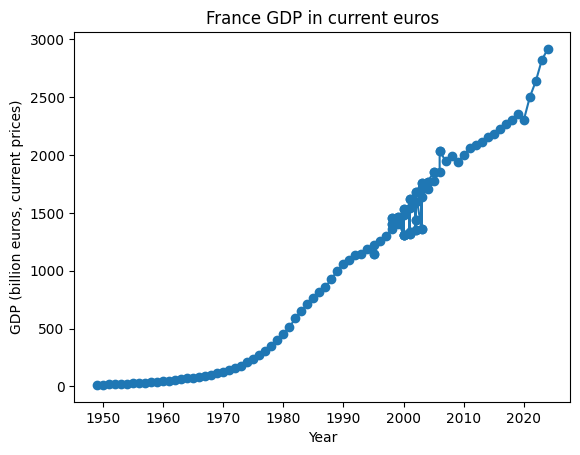

In [50]:
plt.figure()
plt.plot(df["year"], df["gdp_eur_billion"], marker="o")
plt.xlabel("Year")
plt.ylabel("GDP (billion euros, current prices)")
plt.title("France GDP in current euros")
plt.show()
